In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from os import listdir
import seaborn as sns
sns.set_style("white")

In [2]:
from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.regularizers import l1,l2,l1_l2

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json

Using TensorFlow backend.


In [3]:
df_test = pd.read_csv('df_test.csv')
df_test

,5160399000.0,5160532000.0,5160665000.0,5160798000.0,5160931000.0,5161064000.0,5161197000.0,5161330000.0,5161463000.0,5161596000.0,...,5178354000.0,5178487000.0,5178620000.0,5178753000.0,5178886000.0,5179019000.0,5179152000.0,5179285000.0,5179418000.0,target
0,2.950901,0.902424,3.609979,3.055115,4.036279,5.421765,5.709461,5.342877,5.316088,4.677352,...,4.535670,5.781560,5.968084,5.393829,4.983120,4.697924,2.387842,1.606726,0.182691,0
1,3.031936,3.011295,4.798773,5.328106,4.714895,6.324241,6.342548,4.747849,4.850721,4.482862,...,5.628841,6.765914,7.336272,7.453834,5.646930,4.853823,4.431760,4.068731,3.125760,0
2,6.530953,8.500089,12.586018,12.204521,10.663135,11.833899,14.070092,14.178874,12.044108,11.868625,...,11.027771,11.312739,13.174208,13.844385,11.373266,11.034321,10.539037,11.887417,10.584875,0
3,3.164263,5.529422,7.753607,6.913345,8.067882,8.296607,9.290557,7.724988,7.805755,7.959184,...,6.416645,5.814830,6.985933,8.193748,7.569565,8.249093,6.622108,5.638334,6.400860,0
4,8.386093,9.840102,12.134753,12.547019,12.631717,14.261529,13.987828,12.428510,10.985325,10.450608,...,12.186491,12.201777,14.507222,15.508496,13.201510,12.297471,11.698099,13.270782,11.070101,0
5,6.023662,11.058970,13.498687,10.400385,11.516341,13.994253,14.812970,13.592376,11.068720,10.359941,...,12.384987,11.421519,12.508307,13.805166,13.402535,12.459557,11.105112,11.641913,7.829498,0
6,11.855904,9.914749,11.850813,11.484727,12.554704,13.287239,12.812065,11.279834,9.964271,10.473292,...,11.888719,12.026691,14.322939,14.720829,13.583829,12.520845,10.796050,11.873114,10.827345,0
7,3.936545,8.210159,10.308178,9.670616,13.864596,14.127773,16.216343,15.077238,11.596483,12.203186,...,11.634393,11.355016,14.057089,15.128881,14.111677,14.175338,11.606353,12.873405,10.783709,0
8,7.094536,5.655632,8.893394,8.212312,10.392735,9.836021,10.882961,9.272468,8.711961,9.024563,...,9.418217,8.841332,10.676582,10.525266,10.156544,9.622389,7.725622,8.338539,7.338725,0
9,13.265439,10.537382,12.862325,10.062306,12.105781,15.105871,15.638883,13.266718,11.191602,10.314122,...,12.659743,10.854548,14.215042,15.054139,13.448993,12.928502,11.392657,12.206523,8.899485,0


In [4]:
df_list = []
for i in range(18):
    df_split = df_test[df_test['target'] == i]
    df_split.reset_index(drop=True, inplace=True)
    df_list.append(df_split)

In [5]:
# myorder = [0, 1, 2, 5, 4, 3, 6, 7, 8, 11, 10, 9, 12, 13, 14, 17, 16, 15]
myorder = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
test_list = [df_list[i] for i in myorder]
test_list[3]

,5160399000.0,5160532000.0,5160665000.0,5160798000.0,5160931000.0,5161064000.0,5161197000.0,5161330000.0,5161463000.0,5161596000.0,...,5178354000.0,5178487000.0,5178620000.0,5178753000.0,5178886000.0,5179019000.0,5179152000.0,5179285000.0,5179418000.0,target
0,-2.096022,0.438217,0.984025,1.376888,2.238523,3.368650,4.204853,2.494721,3.108924,4.566398,...,4.668105,4.996813,5.705168,4.539088,3.859318,4.303920,3.888772,1.702698,1.297525,3
1,19.244451,18.562550,20.262663,18.958842,19.093179,20.170310,21.886221,21.366626,19.399930,19.816704,...,21.689819,21.674652,22.094001,23.015433,22.249242,21.637944,19.857305,21.444377,19.559879,3
2,0.221053,-1.145537,-0.501613,2.326105,2.752305,2.358892,1.956454,2.773553,2.652963,2.772423,...,5.023408,6.540455,7.276174,7.507465,6.251981,5.367171,6.105089,3.981461,2.395100,3
3,18.073378,22.399351,24.610933,22.675159,23.670168,25.209618,25.249305,23.879888,21.534205,21.231204,...,20.981010,20.136897,22.522655,24.218793,24.297348,22.526635,21.477984,24.161664,22.259404,3
4,-0.902608,-0.790651,0.843996,1.323339,1.646964,2.421748,2.236556,3.114252,2.269427,3.343247,...,5.980159,5.674448,3.557006,3.772289,3.312778,4.704405,2.585121,0.874083,2.949187,3
5,0.150405,0.643277,-0.072173,1.057682,2.295924,2.091342,2.534936,2.426340,2.864367,5.239181,...,6.961657,6.440101,6.905624,5.723474,6.552629,6.650506,4.855231,3.752162,2.420415,3
6,-1.586999,-0.818461,0.747039,1.361306,0.642193,3.113385,2.310344,2.062405,4.131985,4.813005,...,9.008326,9.242918,7.223263,5.387113,5.602322,5.559538,4.336375,4.194343,1.556375,3
7,16.578131,20.546151,24.380352,21.579092,21.829531,23.994518,25.205301,23.864151,21.840124,21.496686,...,20.400114,20.636410,23.063197,24.956606,23.401397,22.481831,21.554200,21.793801,19.972485,3
8,19.400598,21.312784,25.652352,24.081189,23.140464,24.990661,26.323670,24.848523,22.218914,21.798642,...,22.100947,21.796163,24.180061,25.621679,23.991958,22.985293,21.759365,24.507582,22.035570,3
9,19.096045,21.584786,25.062504,23.676912,23.331904,24.311344,26.743705,25.077087,21.728532,21.333820,...,22.410200,23.115208,25.104494,26.263297,24.616605,23.879969,21.534646,23.834105,21.540152,3


In [6]:
df_test = pd.concat(test_list)

In [7]:
df_med = df_test.drop(df_test.iloc[:, :36], axis = 1) 
df_med.drop(df_med.iloc[:, 72:108], inplace = True, axis = 1) 

df_small = df_test.drop(df_test.iloc[:, :54], axis = 1) 
df_small.drop(df_small.iloc[:, 36:90], inplace = True, axis = 1) 

df_smaller = df_test.drop(df_test.iloc[:, :64], axis = 1) 
df_smaller.drop(df_smaller.iloc[:, 18:80], inplace = True, axis = 1) 

In [8]:
df_smooth = df_test.T
df_med = df_med.T
df_small = df_small.T
df_smaller = df_smaller.T

In [9]:
sequences_smooth = list()
for i in range(df_smooth.shape[1]):
    values = df_smooth.iloc[:-1,i].values
    sequences_smooth.append(values)
targets_smooth = df_smooth.iloc[-1, :].values

sequences_med = list()
for i in range(df_med.shape[1]):
    values = df_med.iloc[:-1,i].values
    sequences_med.append(values)
targets_med = df_med.iloc[-1, :].values

sequences_small = list()
for i in range(df_small.shape[1]):
    values = df_small.iloc[:-1,i].values
    sequences_small.append(values)
targets_small = df_small.iloc[-1, :].values

sequences_smaller = list()
for i in range(df_smaller.shape[1]):
    values = df_smaller.iloc[:-1,i].values
    sequences_smaller.append(values)
targets_smaller = df_smaller.iloc[-1, :].values

targets = targets_smooth

In [10]:
targets_smooth

array([ 0.,  0.,  0., ..., 17., 17., 17.])

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.utils import np_utils

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(targets)
encoded_y = encoder.transform(targets)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)
targets = dummy_y

In [12]:
X_test_smooth, X_test_med, X_test_small, X_test_smaller, y_test = sequences_smooth, sequences_med, sequences_small, sequences_smaller, targets

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.externals.joblib import dump, load
sc1 = load('std_scaler_smooth.bin')
X_test_smooth = sc1.transform(X_test_smooth)

sc2 = load('std_scaler_med.bin')
X_test_med = sc2.transform(X_test_med)

sc3 = load('std_scaler_small.bin')
X_test_small = sc3.transform(X_test_small)

sc4 = load('std_scaler_smaller.bin')
X_test_smaller = sc4.transform(X_test_smaller)

/home/hongyu/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [14]:
X_test_smooth.shape, X_test_med.shape, X_test_small.shape, X_test_smaller.shape

((1692, 144), (1692, 72), (1692, 36), (1692, 18))

In [15]:
X_test_smooth = np.reshape(X_test_smooth, (X_test_smooth.shape[0], X_test_smooth.shape[1], 1))
X_test_med = np.reshape(X_test_med, (X_test_med.shape[0], X_test_med.shape[1], 1))
X_test_small = np.reshape(X_test_small, (X_test_small.shape[0], X_test_small.shape[1], 1))
X_test_smaller = np.reshape(X_test_smaller, (X_test_smaller.shape[0], X_test_smaller.shape[1], 1))

In [16]:
n_timesteps_smooth, n_features_smooth = X_test_smooth.shape[1], X_test_smooth.shape[2]
# reshape into subsequences (samples, time steps, rows, cols, channels)
n_steps_smooth, n_length_smooth = 4, 36
X_test_smooth = X_test_smooth.reshape((X_test_smooth.shape[0], n_steps_smooth, 1, n_length_smooth, n_features_smooth))

n_timesteps_med, n_features_med = X_test_med.shape[1], X_test_med.shape[2]
# reshape into subsequences (samples, time steps, rows, cols, channels)
n_steps_med, n_length_med = 3, 24
X_test_med = X_test_med.reshape((X_test_med.shape[0], n_steps_med, 1, n_length_med, n_features_med))

n_timesteps_small, n_features_small = X_test_small.shape[1], X_test_small.shape[2]
# reshape into subsequences (samples, time steps, rows, cols, channels)
n_steps_small, n_length_small = 2, 18
X_test_small = X_test_small.reshape((X_test_small.shape[0], n_steps_small, 1, n_length_small, n_features_small))

n_timesteps_smaller, n_features_smaller = X_test_smaller.shape[1], X_test_smaller.shape[2]
# reshape into subsequences (samples, time steps, rows, cols, channels)
n_steps_smaller, n_length_smaller = 1, 18
X_test_smaller = X_test_smaller.reshape((X_test_smaller.shape[0], n_steps_smaller, 1, n_length_smaller, n_features_smaller))


In [17]:
X_test_smooth.shape

(1692, 4, 1, 36, 1)

In [18]:
y_test.argmax(axis=1)

array([ 0,  0,  0, ..., 17, 17, 17])

In [19]:
class Model:
    def __init__(self, path_model, path_weight):
        self.model = self.loadmodel(path_model, path_weight)
        self.graph = tf.get_default_graph()    
    
    @staticmethod
    def loadmodel(path_model, path_weight):
        json_file = open(path_model, 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        model = model_from_json(loaded_model_json)
        model.load_weights(path_weight)
        return model

    def predict(self, X):
        with self.graph.as_default():
            return self.model.predict(X)

In [20]:
work_dir_model = '/home/hongyu/Documents/Spring2020/ECE_research/signal_analysis/data_18points/3_section_sliding5/MSLSTM_models/'
work_dir_weight = '/home/hongyu/Documents/Spring2020/ECE_research/signal_analysis/data_18points/3_section_sliding5/MSLSTM_weights/'

# work_dir_model = '/home/wuh007/Desktop/signal/signal_analysis/data_18points/3_section/models_mixed/'
# work_dir_weight = '/home/wuh007/Desktop/signal/signal_analysis/data_18points/3_section/weights_mixed/'

In [21]:
model_convlstm = Model(work_dir_model + 'MSLSTM_18ptsconvlstm_model.json', work_dir_weight + 'model-030-0.984992-0.947412-0.172179-18ptsconvlstm.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [22]:
y_pred_convlstm = model_convlstm.predict([X_test_small, X_test_med, X_test_smaller, X_test_smooth])

In [23]:
len(y_pred_convlstm), len(y_test)

(1692, 1692)

In [41]:
y_pred_convlstm

array([[3.05133010e-03, 7.79266953e-01, 1.50419837e-07, ...,
        2.88994462e-14, 6.65970496e-16, 5.57223677e-21],
       [9.92313564e-01, 7.44674960e-03, 3.57858553e-05, ...,
        3.39929294e-18, 5.90334608e-19, 1.48341885e-22],
       [9.99997377e-01, 7.65992070e-09, 1.53448170e-07, ...,
        1.05565371e-19, 1.39849714e-20, 2.18313548e-24],
       ...,
       [2.40458939e-17, 2.98178589e-28, 2.55296796e-28, ...,
        3.32772357e-13, 5.13326265e-16, 9.99999762e-01],
       [1.05747618e-20, 1.41827542e-27, 1.44599386e-28, ...,
        3.74161047e-18, 3.28168851e-20, 9.99998569e-01],
       [1.05901155e-20, 5.45460976e-29, 7.09477157e-30, ...,
        1.81156541e-17, 2.52107228e-19, 9.99999881e-01]], dtype=float32)

In [25]:
# stack clear for 2 and 3 same with three steps, sliding window one step for three different

from collections import deque 
  
# sequential voting stategy
def sequential_voting(sequence = y_pred_convlstm[y_pred_convlstm.max(axis=1) > 0.65].argmax(axis=1),
                      n_steps = 3):
    y_pred_new = list()
    i = 0
    for _ in range(len(sequence)):
#         print(i, len(sequence))
        if i >= len(sequence)-2:
            break
        
        stack = deque([sequence[i], sequence[i+1],sequence[i+2]]) 
#         print(stack)
        
        if len(set(stack)) == 1 or len(set(stack)) == 2:
            for item in set(stack):
                if stack.count(item) > 1:
                    y_pred_new.append(item) 
            while stack:
                stack.pop()
            i += n_steps
            
        else:
            i += n_steps
            
#         print(y_pred_new)
    return y_pred_new

In [26]:
y_pred_convlstm.argmax(axis=1)

array([ 1,  0,  0, ..., 17, 17, 17])

In [27]:
y_test.argmax(axis=1)

array([ 0,  0,  0, ..., 17, 17, 17])

In [28]:
np.where(y_test[y_pred_convlstm.max(axis=1) > 0.65].argmax(axis=1) == 0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86]),)

In [29]:
y_pred_convlstm[np.where(y_test[y_pred_convlstm.max(axis=1) > 0.65].argmax(axis=1) == 0)].argmax(axis=1)

array([ 1,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,
        0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 11,
        2,  0,  0,  0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0, 11,  0,  0,  0,  0,  0,
        0,  0])

In [30]:
y_test[np.where(y_test[y_pred_convlstm.max(axis=1) > 0.65].argmax(axis=1) == 0)].argmax(axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [31]:
len(y_test[np.where(y_test[y_pred_convlstm.max(axis=1) > 0.65].argmax(axis=1) == 0)].argmax(axis=1))

87

In [32]:
len(y_pred_convlstm[np.where(y_test[y_pred_convlstm.max(axis=1) > 0.65].argmax(axis=1) == 0)].argmax(axis=1))

87

In [33]:
y_pred_new_list = list()
y_test_new_list = list()
for i in range(18):
    seq_pred = y_pred_convlstm[np.where(y_test[y_pred_convlstm.max(axis=1) > 0.65].argmax(axis=1) == i)].argmax(axis=1)
    seq_test = y_test[np.where(y_test[y_pred_convlstm.max(axis=1) > 0.65].argmax(axis=1) == i)].argmax(axis=1)
    y_pred_new = sequential_voting(sequence = seq_pred)
    y_test_new = sequential_voting(sequence = seq_test)
    if len(y_pred_new) != len(y_test_new):
        y_test_new = y_test_new[:len(y_pred_new)]
    y_pred_new_list.append(y_pred_new)
    y_test_new_list.append(y_test_new)

In [34]:
import itertools
y_pred_new_total = list(itertools.chain.from_iterable(y_pred_new_list))
y_test_new_total = list(itertools.chain.from_iterable(y_test_new_list))

In [43]:
len(y_pred_new_total), len(y_test_new_total)

(534, 534)

In [36]:
y_pred_new_total = np.asarray(y_pred_new_total)
y_test_new_total = np.asarray(y_test_new_total)

In [44]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

matrix_new = confusion_matrix(y_test_new_total, y_pred_new_total)
# matrix

FP = matrix_new.sum(axis=0) - np.diag(matrix_new)  
FN = matrix_new.sum(axis=1) - np.diag(matrix_new)
TP = np.diag(matrix_new)
TN = matrix_new.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
# TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
# NPV = TN/(TN+FN)
# Fall out or false positive rate
# FPR = FP/(FP+TN)
# False negative rate
# FNR = FN/(TP+FN)
# False discovery rate
# FDR = FP/(TP+FP)
# Overall accuracy
RECALL = sum(TPR)/18
PRECISION = sum(PPV)/18
ACC = sum((TP+TN)/(TP+FP+FN+TN))/18
#     print(TPR, FPR)
F1 = sum((2 * TPR * PPV) / (TPR + PPV))/18
RECALL, PRECISION, F1, ACC

(0.9836200459358133, 0.984562577067321, 0.9837498415367268, 0.9981273408239701)

In [38]:
plot_confusion_matrix(matrix_new, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])

NameError: name 'plot_confusion_matrix' is not defined

In [42]:
# matrix = confusion_matrix(y_pred_convlstm.argmax(axis=1), y_test.argmax(axis=1))
matrix = confusion_matrix(y_test[y_pred_convlstm.max(axis=1) > 0.65].argmax(axis=1), y_pred_convlstm[y_pred_convlstm.max(axis=1) > 0.65].argmax(axis=1))
# matrix

FP = matrix.sum(axis=0) - np.diag(matrix)  
FN = matrix.sum(axis=1) - np.diag(matrix)
TP = np.diag(matrix)
TN = matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
# TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
# NPV = TN/(TN+FN)
# Fall out or false positive rate
# FPR = FP/(FP+TN)
# False negative rate
# FNR = FN/(TP+FN)
# False discovery rate
# FDR = FP/(TP+FP)
# Overall accuracy
RECALL = sum(TPR)/18
PRECISION = sum(PPV)/18
ACC = sum((TP+TN)/(TP+FP+FN+TN))/18
#     print(TPR, FPR)
F1 = sum((2 * TPR * PPV) / (TPR + PPV))/18
RECALL, PRECISION, F1, ACC

(0.9487105819901552,
 0.9499666558883368,
 0.9487674715308678,
 0.9944103612815268)

In [29]:
len(y_test), len(y_test[y_pred_2sec.max(axis=1) > 0.65])

(1692, 1630)

In [39]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage|
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(16, 14))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="red" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="red" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
    
plot_confusion_matrix(matrix, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])

NameError: name 'matrix' is not defined

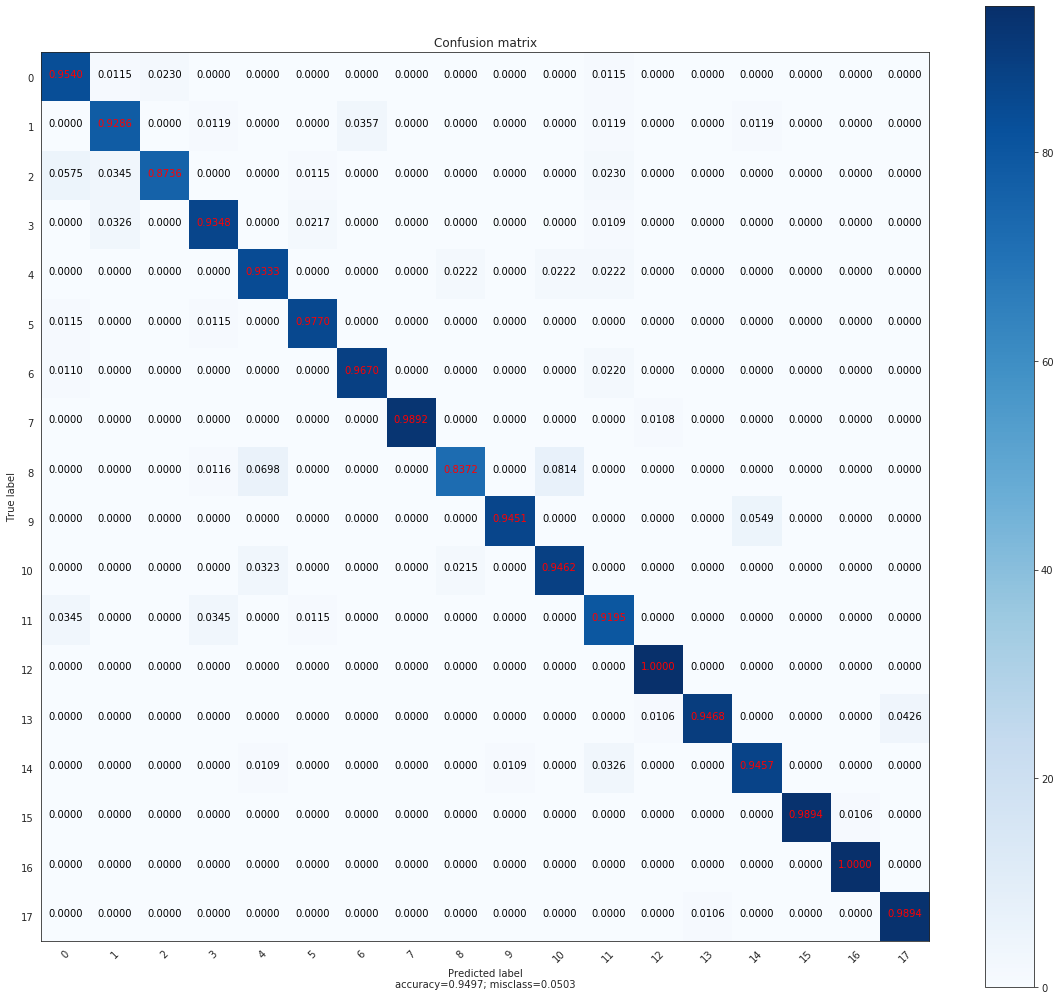

In [30]:
plot_confusion_matrix(matrix, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])

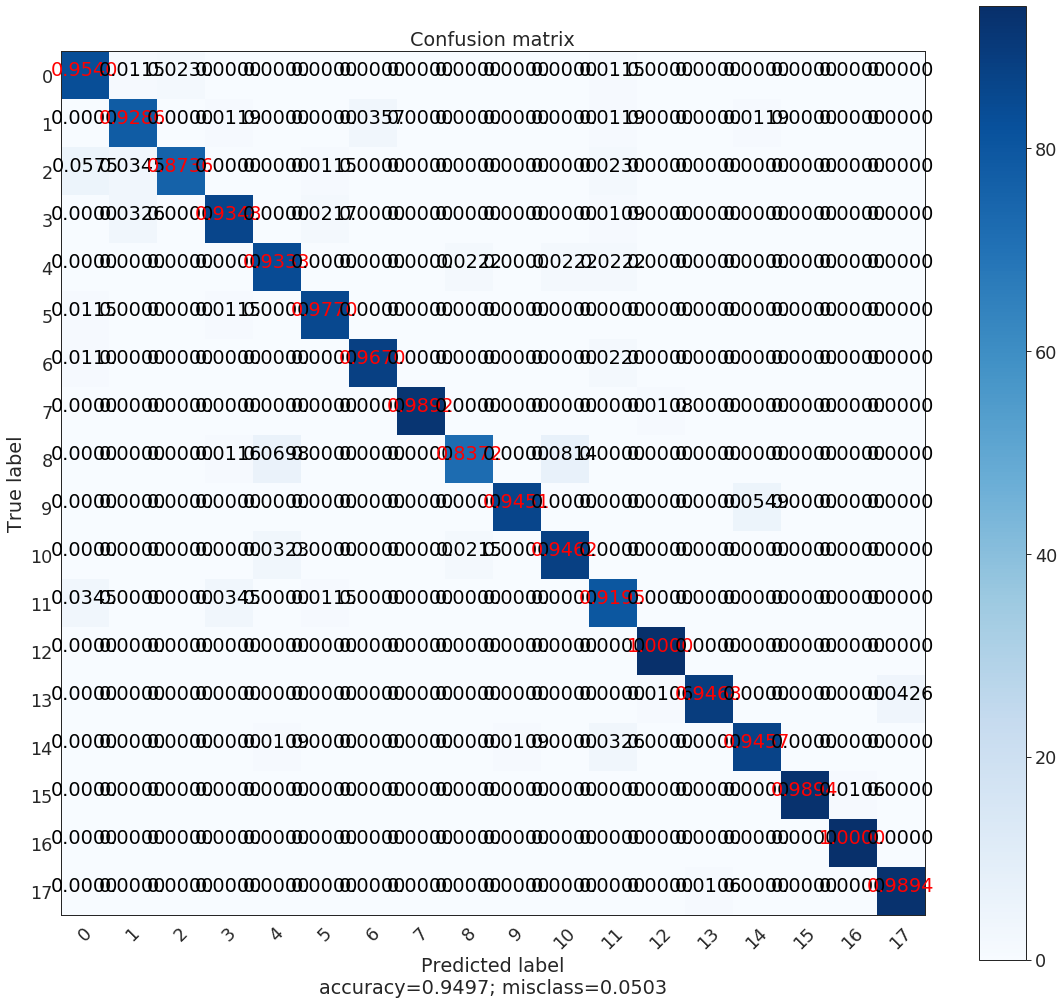

In [138]:
plot_confusion_matrix(matrix, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])

In [77]:
tl = np.sum(matrix[:9, :9])
tr = np.sum(matrix[:9, 9:])
bl = np.sum(matrix[9:, :9])
br = np.sum(matrix[9:, 9:])
(tl+br)/(tl+tr+bl+br)

0.9692671394799054

In [91]:
matrix[:9, :9]

array([[84,  5,  5,  2,  0,  1,  2,  0,  0],
       [ 1, 70,  4,  0,  0,  3,  2,  0,  0],
       [ 2,  3, 79,  0,  0,  1,  1,  0,  0],
       [ 0,  1,  0, 87,  0,  1,  3,  0,  0],
       [ 0,  0,  0,  0, 84,  0,  0,  0,  5],
       [ 0,  2,  0,  1,  0, 84,  0,  0,  0],
       [ 4,  7,  2,  1,  0,  1, 84,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 91,  0],
       [ 0,  0,  0,  0,  3,  0,  1,  0, 72]])

In [44]:

y_pred_2sec[y_pred_2sec.argmax(axis=1) == y_test.argmax(axis=1)].max(axis=1)

array([0.99231356, 0.9999974 , 0.9993326 , ..., 1.        , 0.9999949 ,
       0.99999964], dtype=float32)

In [ ]:
y_test[y_pred_2sec.max(axis=1) < 0.70].argmax(axis=1)

In [87]:
matrix_drop = confusion_matrix(y_pred_2sec[y_pred_2sec.max(axis=1) < 0.70].argmax(axis=1), y_test[y_pred_2sec.max(axis=1) < 0.70].argmax(axis=1))
matrix_drop

array([[2, 3, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 6, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0],
       [3, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

In [88]:
accuracy = np.trace(matrix_drop) / np.sum(matrix_drop).astype('float')
misclass = 1 - accuracy

In [89]:
accuracy, misclass

(0.4666666666666667, 0.5333333333333333)

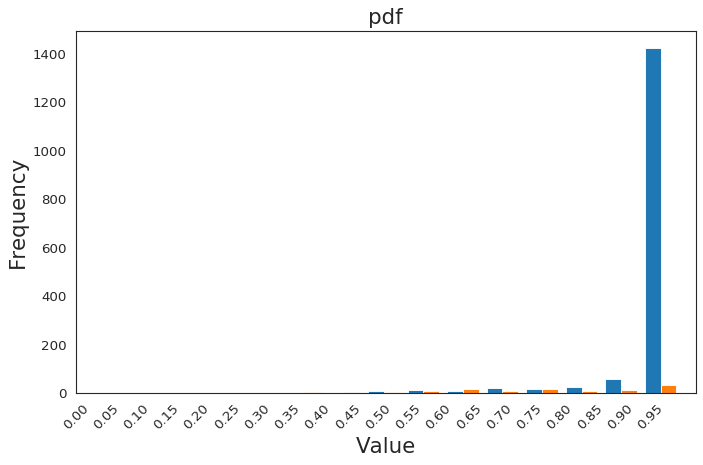

In [72]:

plt.figure(figsize=(10,6), dpi= 80)
arr = plt.hist([y_pred_2sec[y_pred_2sec.argmax(axis=1) == y_test.argmax(axis=1)].max(axis=1),y_pred_2sec[y_pred_2sec.argmax(axis=1) != y_test.argmax(axis=1)].max(axis=1)],
         bins=20,
         density=False,
         cumulative=False)
for i in range(20):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))

plt.title('pdf')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 1.0, step=0.05))
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.show()

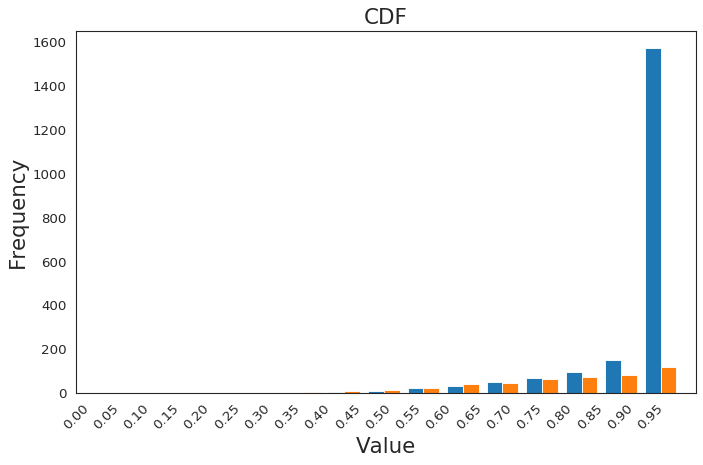

In [73]:
plt.figure(figsize=(10,6), dpi= 80)
plt.hist([y_pred_2sec[y_pred_2sec.argmax(axis=1) == y_test.argmax(axis=1)].max(axis=1),y_pred_2sec[y_pred_2sec.argmax(axis=1) != y_test.argmax(axis=1)].max(axis=1)],
         bins=10,
         density=False,
         cumulative=True)
     
plt.title('CDF')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 1.0, step=0.05))
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.show()

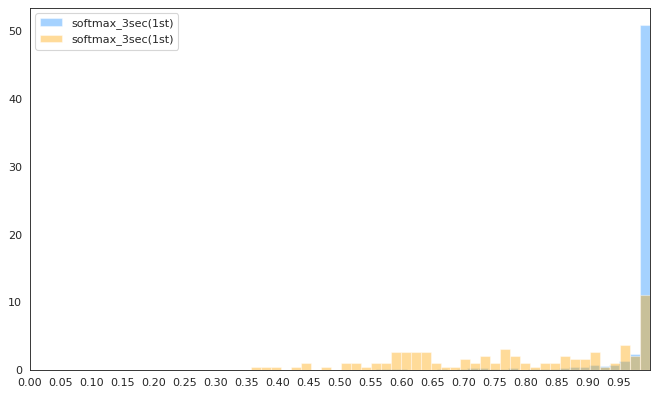

In [55]:
kwargs = dict(hist_kws={'alpha':.4}, kde_kws={'linewidth':0})

plt.figure(figsize=(10,6), dpi= 80)
sns.distplot(y_pred_2sec[y_pred_2sec.argmax(axis=1) == y_test.argmax(axis=1)].max(axis=1), bins=40, color="dodgerblue", label="softmax_3sec(1st)", **kwargs)
sns.distplot(y_pred_2sec[y_pred_2sec.argmax(axis=1) != y_test.argmax(axis=1)].max(axis=1), bins=40, color="orange", label="softmax_3sec(1st)", **kwargs)

# sns.distplot(y_pred_3sec_secondmax.max(axis=1), bins=20, color="orange", label="softmax_3sec(2nd)", **kwargs)
# sns.distplot(y_pred_3sec.min(axis=1), bins=20, color="deeppink", label="softmax_3sec(3rd)", **kwargs)
plt.xlim(0,1)
plt.xticks(np.arange(0, 1.0, step=0.05))
plt.legend();

In [48]:
from sklearn.metrics import classification_report

report = classification_report(y_pred_2sec.argmax(axis=1), y_test.argmax(axis=1))
print(report)

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       103
           1       0.86      0.91      0.89        89
           2       0.84      0.96      0.90        82
           3       0.91      0.91      0.91        94
           4       0.90      0.89      0.89        96
           5       0.94      0.96      0.95        92
           6       0.95      0.93      0.94        96
           7       0.98      1.00      0.99        92
           8       0.81      0.93      0.86        82
           9       0.93      0.99      0.96        88
          10       0.95      0.86      0.90       104
          11       0.90      0.82      0.86       104
          12       1.00      0.97      0.98        97
          13       0.95      0.99      0.97        90
          14       0.95      0.91      0.93        98
          15       0.99      1.00      0.99        93
          16       1.00      0.99      0.99        95
          17       0.99    

In [114]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score



p_score = dict()
r_score = dict()
f_score = dict()
drop_rate = dict()
theta1 = dict()
theta2 = dict()
theta3 = dict()
theta4 = dict()
tpr = dict()
fpr = dict()

def frange(start, stop=None, step=None):

    if stop == None:
        stop = start + 0.0
        start = 0.0

    if step == None:
        step = 1.0

    while True:
        if step > 0 and start >= stop:
            break
        elif step < 0 and start <= stop:
            break
        yield ("%g" % start) # return float number
        start = start + step

for threshold in frange(0.5, 1.0, 0.01):
    p = precision_score(y_test[y_pred_2sec.max(axis=1) >= float(threshold)].argmax(axis=1), y_pred_2sec[y_pred_2sec.max(axis=1) >= float(threshold)].argmax(axis=1), average='macro')
    r = recall_score(y_test[y_pred_2sec.max(axis=1) >= float(threshold)].argmax(axis=1), y_pred_2sec[y_pred_2sec.max(axis=1) >= float(threshold)].argmax(axis=1), average='macro')
    f = f1_score(y_test[y_pred_2sec.max(axis=1) >= float(threshold)].argmax(axis=1), y_pred_2sec[y_pred_2sec.max(axis=1) >= float(threshold)].argmax(axis=1), average='macro')
    d = (len(y_test) - len(y_test[y_pred_2sec.max(axis=1) >= float(threshold)].argmax(axis=1))) / len(y_test)
    p_score.update({threshold : p})
    r_score.update({threshold : r})
    f_score.update({threshold : f})
    drop_rate.update({threshold : d})
    
    matrix_drop = confusion_matrix(y_pred_2sec[y_pred_2sec.max(axis=1) < float(threshold)].argmax(axis=1), y_test[y_pred_2sec.max(axis=1) < float(threshold)].argmax(axis=1))
    accuracy = np.trace(matrix_drop) / np.sum(matrix_drop).astype('float')
    misclass = 1 - accuracy
    theta4.update({threshold : misclass})
    
    
    
    cnf_matrix = confusion_matrix(y_test[y_pred_2sec.max(axis=1) >= float(threshold)].argmax(axis=1), y_pred_2sec[y_pred_2sec.max(axis=1) >= float(threshold)].argmax(axis=1))
    FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
    FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
    TP = np.diag(cnf_matrix)
    TN = cnf_matrix.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
#     print(TPR, FPR)
    theta1.update({threshold : (np.average(ACC)) / (np.exp(d) + np.average(FPR))})
    theta2.update({threshold : f / (d + np.average(np.exp(FPR)))})
    theta3.update({threshold : np.average(TPR) / (np.exp(d + np.average(FPR)))})
    tpr.update({threshold: np.average(TPR)})
    fpr.update({threshold: np.average(FPR)})

In [115]:
theta1, theta2, theta3

({'0.5': 0.9812703842362044,
  '0.51': 0.9802017801551508,
  '0.52': 0.978651213670623,
  '0.53': 0.9770044732313822,
  '0.54': 0.9759412015756611,
  '0.55': 0.9747799642830939,
  '0.56': 0.9742989867571076,
  '0.57': 0.9726597645887956,
  '0.58': 0.9716017272958732,
  '0.59': 0.9684349334153576,
  '0.6': 0.9648048192143508,
  '0.61': 0.9638550253987576,
  '0.62': 0.9608159681944236,
  '0.63': 0.958828866794271,
  '0.64': 0.9568465746043299,
  '0.65': 0.9559068770742537,
  '0.66': 0.9537350630310427,
  '0.67': 0.9527002717424838,
  '0.68': 0.9516668370124226,
  '0.69': 0.9511013944697361,
  '0.7': 0.9489412711636099,
  '0.71': 0.9452960613378546,
  '0.72': 0.942589683660523,
  '0.73': 0.9398912353714813,
  '0.74': 0.9372009784644436,
  '0.75': 0.9332458259201347,
  '0.76': 0.9327894712805489,
  '0.77': 0.9287592947986136,
  '0.78': 0.9257487998618938,
  '0.79': 0.9215573035346935,
  '0.8': 0.9195666402166337,
  '0.81': 0.9173857925798652,
  '0.82': 0.9158509047244402,
  '0.83': 0.91377

In [116]:
drop_rate, theta4

({'0.5': 0.0076832151300236405,
  '0.51': 0.008865248226950355,
  '0.52': 0.010638297872340425,
  '0.53': 0.012411347517730497,
  '0.54': 0.013593380614657211,
  '0.55': 0.014775413711583925,
  '0.56': 0.015366430260047281,
  '0.57': 0.017139479905437353,
  '0.58': 0.018321513002364065,
  '0.59': 0.02186761229314421,
  '0.6': 0.026004728132387706,
  '0.61': 0.027186761229314422,
  '0.62': 0.030732860520094562,
  '0.63': 0.03309692671394799,
  '0.64': 0.03546099290780142,
  '0.65': 0.03664302600472813,
  '0.66': 0.03900709219858156,
  '0.67': 0.04018912529550828,
  '0.68': 0.041371158392434985,
  '0.69': 0.04196217494089834,
  '0.7': 0.044326241134751775,
  '0.71': 0.04846335697399527,
  '0.72': 0.051418439716312055,
  '0.73': 0.054373522458628844,
  '0.74': 0.057328605200945626,
  '0.75': 0.06205673758865248,
  '0.76': 0.06264775413711583,
  '0.77': 0.0673758865248227,
  '0.78': 0.07092198581560284,
  '0.79': 0.07565011820330969,
  '0.8': 0.07801418439716312,
  '0.81': 0.08037825059101

('0.5', '0.51', '0.52', '0.53', '0.54', '0.55', '0.56', '0.57', '0.58', '0.59', '0.6', '0.61', '0.62', '0.63', '0.64', '0.65', '0.66', '0.67', '0.68', '0.69', '0.7', '0.71', '0.72', '0.73', '0.74', '0.75', '0.76', '0.77', '0.78', '0.79', '0.8', '0.81', '0.82', '0.83', '0.84', '0.85', '0.86', '0.87', '0.88', '0.89', '0.9', '0.91', '0.92', '0.93', '0.94', '0.95', '0.96', '0.97', '0.98', '0.99') (0.5384615384615384, 0.5333333333333333, 0.5555555555555556, 0.5238095238095238, 0.5217391304347826, 0.48, 0.5, 0.48275862068965514, 0.4838709677419355, 0.4864864864864865, 0.5, 0.5217391304347826, 0.5384615384615384, 0.5535714285714286, 0.5666666666666667, 0.5806451612903225, 0.5606060606060606, 0.5588235294117647, 0.5571428571428572, 0.5492957746478873, 0.5333333333333333, 0.524390243902439, 0.5057471264367817, 0.48913043478260865, 0.4742268041237113, 0.48571428571428577, 0.49056603773584906, 0.49122807017543857, 0.4916666666666667, 0.4765625, 0.4772727272727273, 0.4632352941176471, 0.4604316546

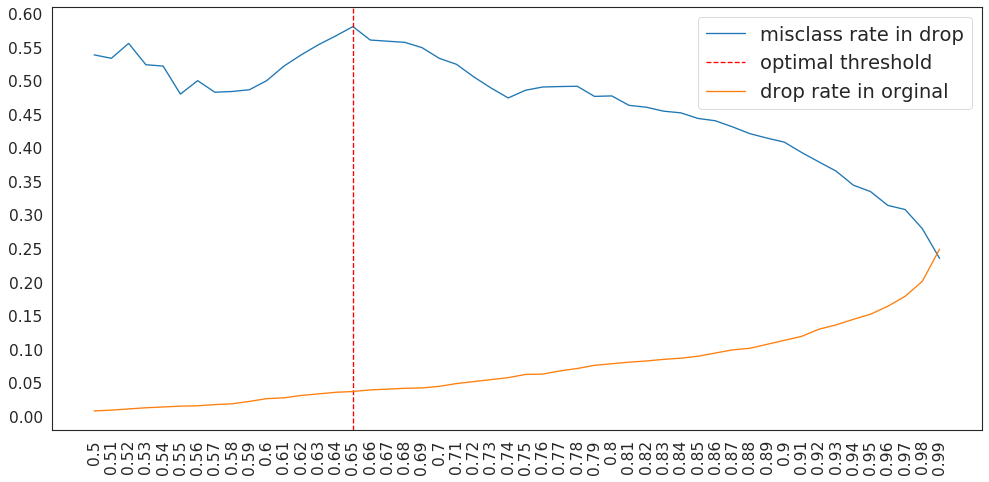

In [136]:
miss_list = theta4.items() # sorted by key, return a list of tuples

x1, y1 = zip(*miss_list) # unpack a list of pairs into two tuples
print(x1,y1)
plt.figure(figsize=(15,7), dpi= 80)
plt.plot(x1, y1, label='misclass rate in drop')
# plt.xticks(np.arange(0, 1, step=0.1))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)
plt.yticks(np.arange(0, 1, step=0.05))
# plt.show()

drop_list = drop_rate.items() # sorted by key, return a list of tuples

x2, y2 = zip(*drop_list) # unpack a list of pairs into two tuples
# print(x2,y2)
# plt.figure(figsize=(10, 6), dpi= 80)
xposition = [15]
for xc in xposition:
    plt.axvline(x=xc, color='r', linestyle='--',label='optimal threshold')
plt.plot(x1, y2, label='drop rate in orginal')
plt.legend(loc='upper right')


# plt.xticks(np.arange(0, 1.0, step=0.05))
# plt.show()